In [ ]:
!pip install opendatasets

In [2]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
od.download("https://www.kaggle.com/datasets/shashwatwork/dementia-prediction-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zehavit378
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shashwatwork/dementia-prediction-dataset


100%|██████████| 6.74k/6.74k [00:00<00:00, 10.5MB/s]

In [7]:
df = pd.read_csv('/content/dementia-prediction-dataset/dementia_dataset.csv')

In [8]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [9]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [10]:
df['Subject ID'].nunique()

150

In [11]:
df.shape

(373, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [13]:
df.isnull().sum()

,0
Subject ID,0
MRI ID,0
Group,0
Visit,0
MR Delay,0
M/F,0
Hand,0
Age,0
EDUC,0
SES,19


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


In [15]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')


## Features description:
*   Subject ID: Subject identification number.
*   MRI ID: Image identification number of an individual subject.
*   Group: Demented/Nondemented/Converted.
*   Visit: Number of subject visits.
*  MR Delay: Magnetic resonance (MR) delay is the delay time that is prior to the image procurement.
* M/F: Male/Female.
* Hand: Right/Left handed.
* Age: Subject age while scanning.
* EDUC: Subject education level (in years).
* SES: Socioeconomic status.
* MMSE: Mini-mental state examination score.
* CDR: Clinical dementia rating score.
* eTIV: Estimated total intracranial volume result.
* nWBV: Normalized whole brain volume result.
* ASF: Atlas scaling factor.







In [16]:
df['Hand'].unique()

array(['R'], dtype=object)

### Seperating visits to different columns

In [17]:
# Pivot the DataFrame to add columns for each visit
df_pivot = df.pivot(index='Subject ID', columns='Visit', values=['Age', 'MR Delay', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'])
df_pivot.columns = ['_'.join(map(str, col)).strip() for col in df_pivot.columns.values]
df_pivot.reset_index(inplace=True)

# Add EDUC and SES columns (taking the first occurrence for each Subject ID)
df_pivot = df_pivot.merge(df[['Subject ID', 'EDUC', 'SES', 'M/F', 'Group']].drop_duplicates(subset=['Subject ID']), on='Subject ID')


In [18]:
df_pivot.head()

,Subject ID,Age_1,Age_2,Age_3,Age_4,Age_5,MR Delay_1,MR Delay_2,MR Delay_3,MR Delay_4,...,nWBV_5,ASF_1,ASF_2,ASF_3,ASF_4,ASF_5,EDUC,SES,M/F,Group
0,OAS2_0001,87.0,88.0,NaN,NaN,NaN,0.0,457.0,NaN,NaN,...,NaN,0.883,0.876,NaN,NaN,NaN,14,2.0,M,Nondemented
1,OAS2_0002,75.0,76.0,80.0,NaN,NaN,0.0,560.0,1895.0,NaN,...,NaN,1.046,1.010,1.034,NaN,NaN,12,NaN,M,Demented
2,OAS2_0004,88.0,90.0,NaN,NaN,NaN,0.0,538.0,NaN,NaN,...,NaN,1.444,1.462,NaN,NaN,NaN,18,3.0,F,Nondemented
3,OAS2_0005,80.0,83.0,85.0,NaN,NaN,0.0,1010.0,1603.0,NaN,...,NaN,1.039,1.032,1.033,NaN,NaN,12,4.0,M,Nondemented
4,OAS2_0007,71.0,NaN,73.0,75.0,NaN,0.0,NaN,518.0,1281.0,...,NaN,1.293,NaN,1.286,1.279,NaN,16,NaN,M,Demented


In [19]:
df_pivot.shape

(150, 40)

In [20]:
df_pivot.columns

Index(['Subject ID', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'MR Delay_1',
       'MR Delay_2', 'MR Delay_3', 'MR Delay_4', 'MR Delay_5', 'MMSE_1',
       'MMSE_2', 'MMSE_3', 'MMSE_4', 'MMSE_5', 'CDR_1', 'CDR_2', 'CDR_3',
       'CDR_4', 'CDR_5', 'eTIV_1', 'eTIV_2', 'eTIV_3', 'eTIV_4', 'eTIV_5',
       'nWBV_1', 'nWBV_2', 'nWBV_3', 'nWBV_4', 'nWBV_5', 'ASF_1', 'ASF_2',
       'ASF_3', 'ASF_4', 'ASF_5', 'EDUC', 'SES', 'M/F', 'Group'],
      dtype='object')

In [21]:
df_pivot['Group'].value_counts()

,count
Group,
Nondemented,72
Demented,64
Converted,14


In [22]:
feat_1 = ['Age_1', 'MMSE_1', 'CDR_1', 'eTIV_1', 'nWBV_1', 'ASF_1']


In [23]:
df_pivot[feat_1].isnull().sum()

,0
Age_1,0
MMSE_1,0
CDR_1,0
eTIV_1,0
nWBV_1,0
ASF_1,0


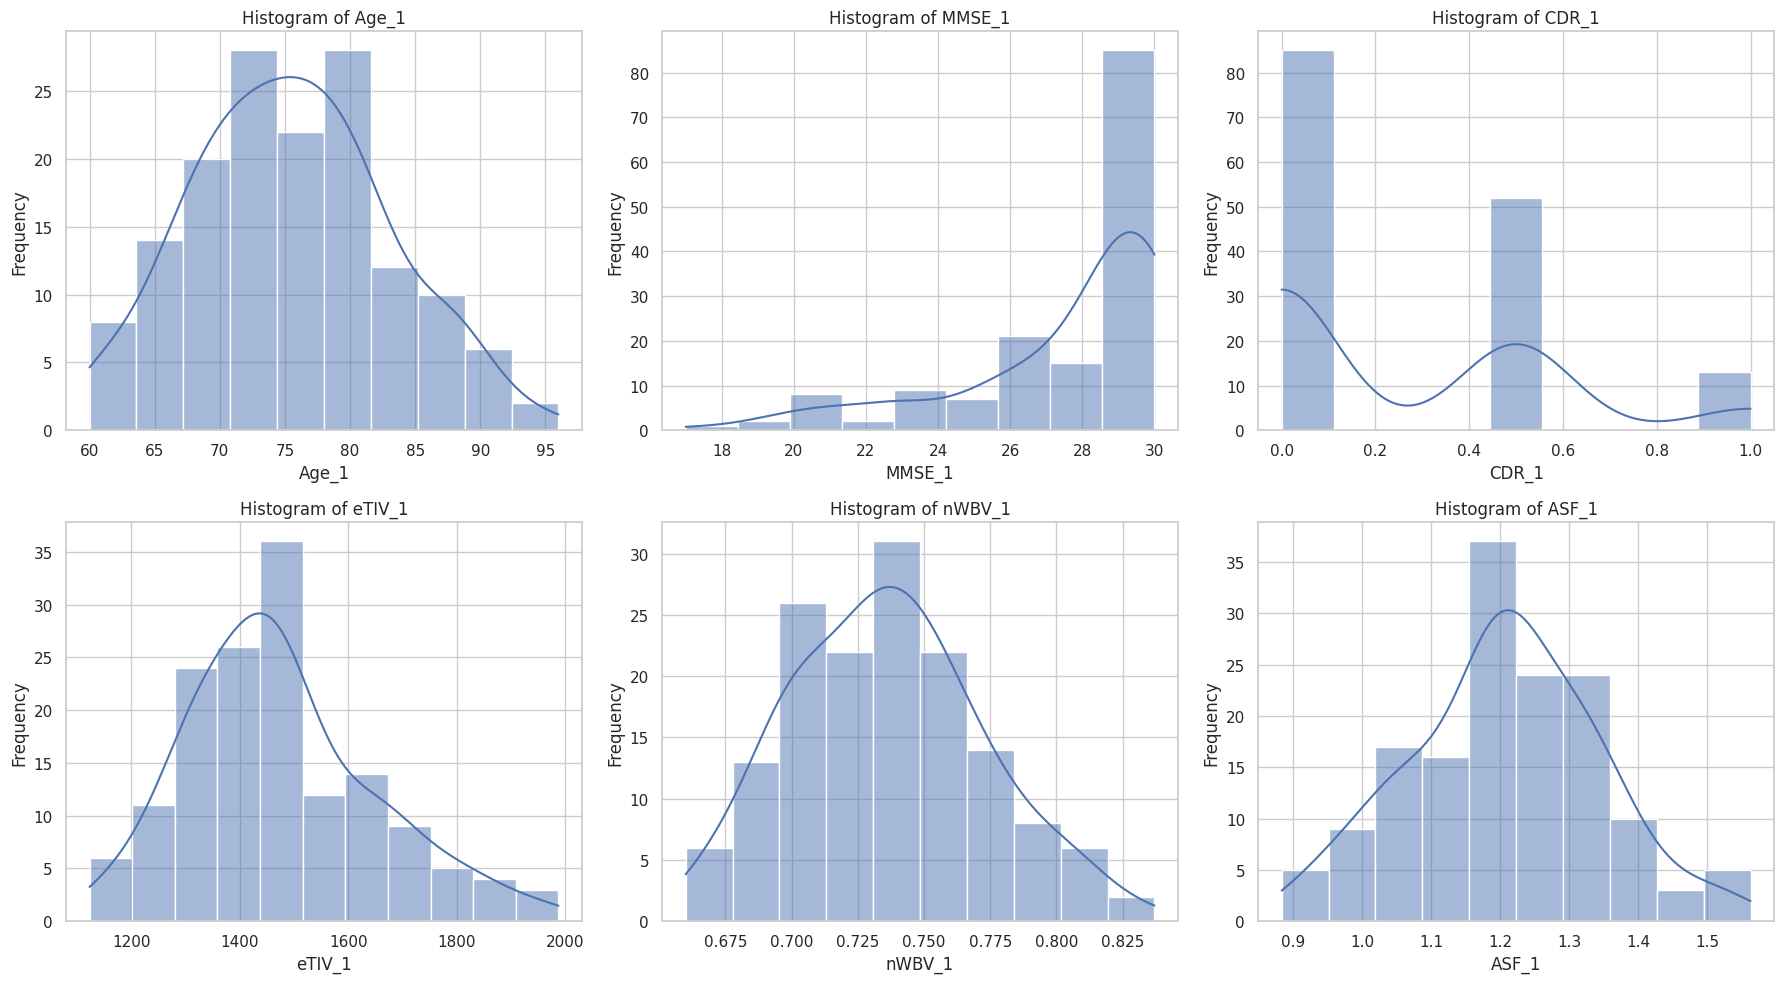

In [24]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot a histogram for each feature in feat_1
for i, feature in enumerate(feat_1):
    sns.histplot(df_pivot[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## Statistical tests

#### Normality tests

In [25]:
from scipy.stats import kstest

# Kolmogorov-Smirnov Test
def ks_test(data, feat):
  ks_stat, ks_p = kstest(data[feat], 'norm', args=(np.mean(data[feat]), np.std(data[feat])))
  return ks_stat, ks_p

In [26]:
feat_un = ['EDUC', 'SES'] + feat_1
feat_un

['EDUC', 'SES', 'Age_1', 'MMSE_1', 'CDR_1', 'eTIV_1', 'nWBV_1', 'ASF_1']

In [27]:
norm_feat = {}

for f in feat_un:
  ks_stat, ks_p = ks_test(df_pivot, f)
  print(f"{f}")
  print(f'KS Test Statistic: {ks_stat}')
  print(f'p-value: {ks_p}')
  if ks_p > 0.05:
    norm_feat[f] = ks_p
  print()

print(norm_feat)

EDUC
KS Test Statistic: 0.16503900544041727
p-value: 0.00048712063632017213

SES
KS Test Statistic: nan
p-value: nan

Age_1
KS Test Statistic: 0.054206589703127916
p-value: 0.7492357412699923

MMSE_1
KS Test Statistic: 0.25343954528093793
p-value: 5.58120462535994e-09

CDR_1
KS Test Statistic: 0.35469249213801635
p-value: 2.1744192967821347e-17

eTIV_1
KS Test Statistic: 0.10077022587661943
p-value: 0.08865181770673347

nWBV_1
KS Test Statistic: 0.04157895739246842
p-value: 0.9480894518681836

ASF_1
KS Test Statistic: 0.05359477539468299
p-value: 0.7613585567068604

{'Age_1': 0.7492357412699923, 'eTIV_1': 0.08865181770673347, 'nWBV_1': 0.9480894518681836, 'ASF_1': 0.7613585567068604}


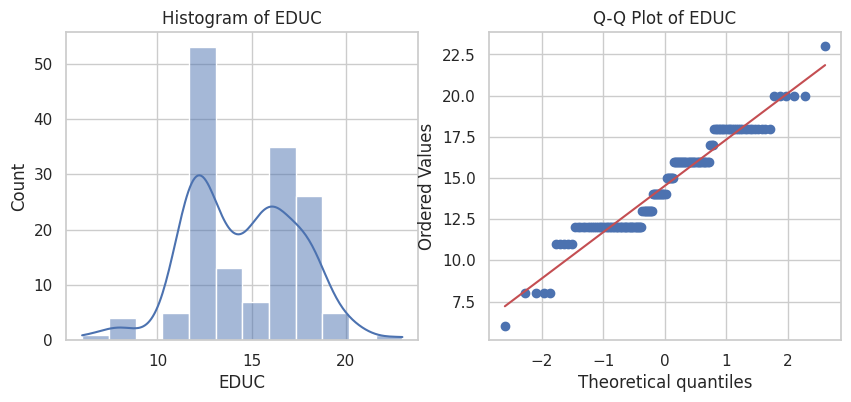

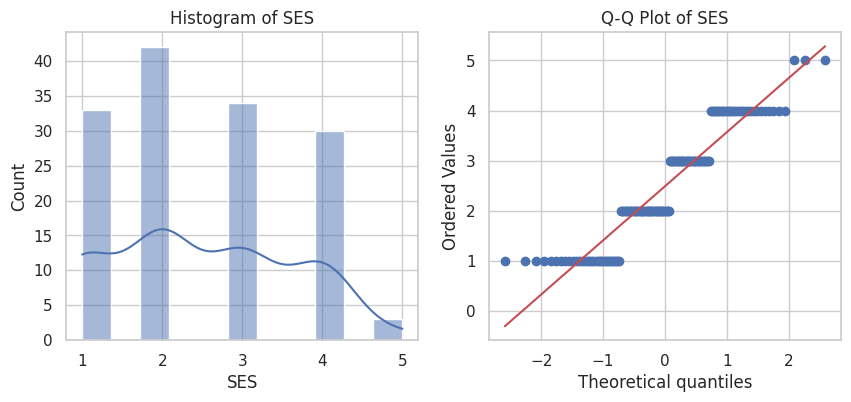

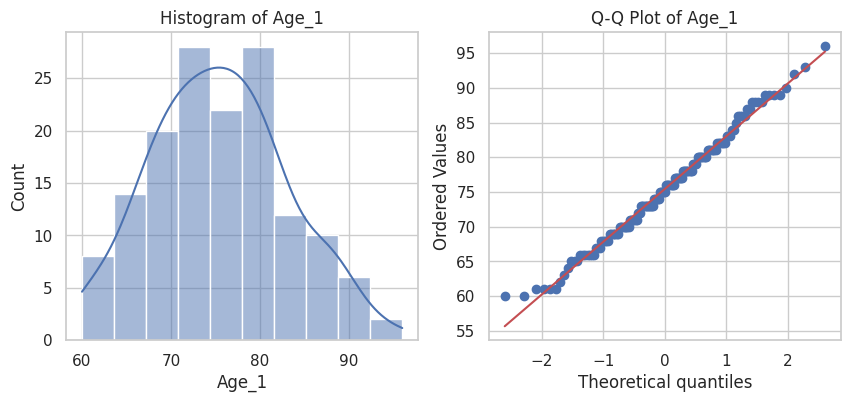

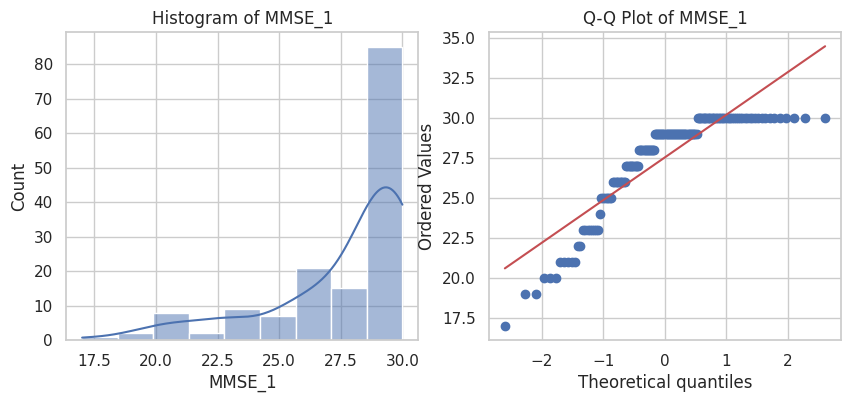

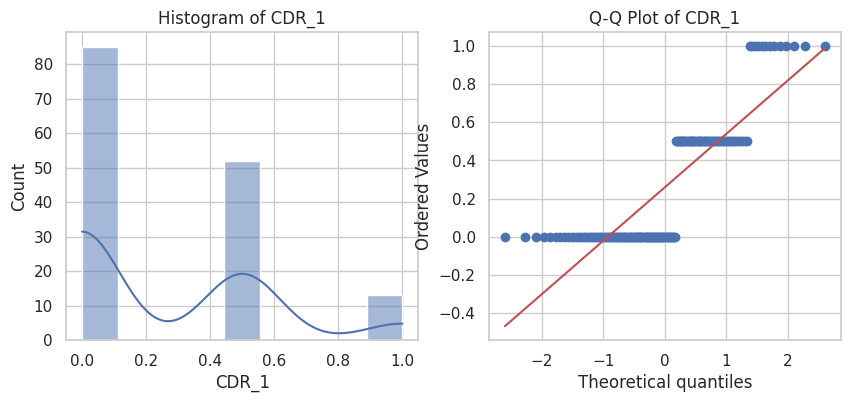

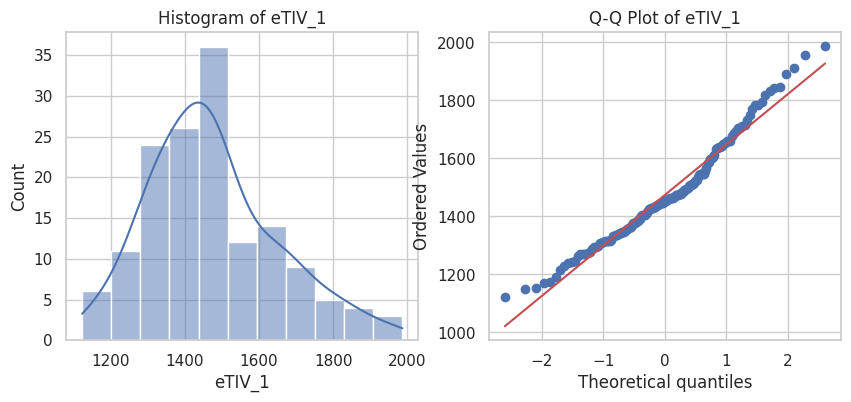

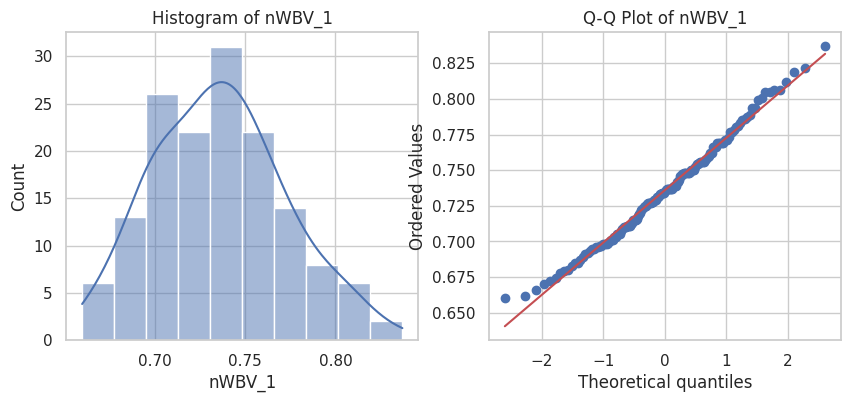

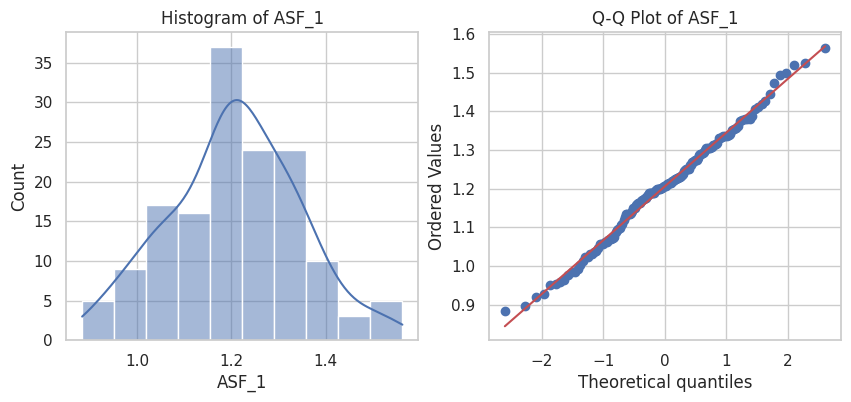

Results for EDUC:
  Shapiro-Wilk: {'Statistic': 0.9375217150049729, 'p-value': 3.442929536848687e-06}
  Kolmogorov-Smirnov: {'Statistic': 0.16503900544041727, 'p-value': 0.00048712063632017213}
  Anderson-Darling: {'Statistic': 4.195586144248921, 'Critical Values': array([0.562, 0.64 , 0.767, 0.895, 1.065]), 'Significance Levels': array([15. , 10. ,  5. ,  2.5,  1. ])}
  D'Agostino: {'Statistic': 0.026333374376068787, 'p-value': 0.9869196144535839}


Results for SES:
  Shapiro-Wilk: {'Statistic': 0.8882214090917342, 'p-value': 6.233116308570256e-09}
  Kolmogorov-Smirnov: {'Statistic': 0.19764265025438216, 'p-value': 2.45568190547588e-05}
  Anderson-Darling: {'Statistic': 5.9535322391443515, 'Critical Values': array([0.561, 0.639, 0.766, 0.894, 1.063]), 'Significance Levels': array([15. , 10. ,  5. ,  2.5,  1. ])}
  D'Agostino: {'Statistic': 28.8701604482557, 'p-value': 5.381759831056484e-07}


Results for Age_1:
  Shapiro-Wilk: {'Statistic': 0.9893638405025162, 'p-value': 0.31446608925

In [28]:
from scipy.stats import shapiro, kstest, anderson, normaltest, probplot

# Function to check normality
def check_normality(df, features):
    results = {}
    for feature in features:
        data = df[feature].dropna()  # Drop missing values for the feature

        # Histogram
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(data, kde=True)
        plt.title(f'Histogram of {feature}')

        # Q-Q Plot
        plt.subplot(1, 2, 2)
        probplot(data, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {feature}')
        plt.show()

        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(data)

        # Kolmogorov-Smirnov Test
        ks_stat, ks_p = kstest(data, 'norm', args=(np.mean(data), np.std(data)))

        # Anderson-Darling Test
        anderson_result = anderson(data)

        # D'Agostino's K-squared Test
        dagostino_stat, dagostino_p = normaltest(data)

        results[feature] = {
            'Shapiro-Wilk': {'Statistic': shapiro_stat, 'p-value': shapiro_p},
            'Kolmogorov-Smirnov': {'Statistic': ks_stat, 'p-value': ks_p},
            'Anderson-Darling': {'Statistic': anderson_result.statistic, 'Critical Values': anderson_result.critical_values, 'Significance Levels': anderson_result.significance_level},
            'D\'Agostino': {'Statistic': dagostino_stat, 'p-value': dagostino_p}
        }

    return results

# Check normality for the numerical features
normality_results = check_normality(df_pivot, feat_un)

# Print results
for feature, tests in normality_results.items():
    print(f"Results for {feature}:")
    for test, result in tests.items():
        print(f"  {test}: {result}")
    print("\n")

In [29]:
df_pivot[feat_un].nunique()

,0
EDUC,12
SES,5
Age_1,34
MMSE_1,13
CDR_1,3
eTIV_1,131
nWBV_1,90
ASF_1,129


#### Mann Whitney U test

'EDUC' feature

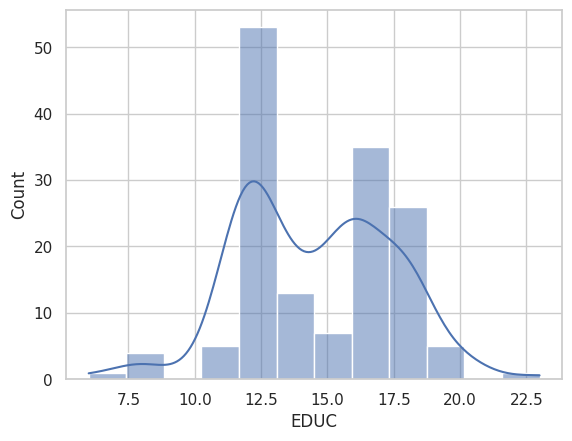

In [30]:
sns.histplot(data=df_pivot, x='EDUC', kde=True)
plt.show()

In [31]:
from scipy.stats import mannwhitneyu

# Divide into groups
group1 = df_pivot[df_pivot['Group'] == 'Demented']['EDUC']
group2 = df_pivot[df_pivot['Group'] == 'Nondemented']['EDUC']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(group1, group2)

print(f'Mann-Whitney U Test Statistic: {stat}')
print(f'p-value: {p_value}')


Mann-Whitney U Test Statistic: 1617.0
p-value: 0.0022759733537818937


'eTIV_1' feature

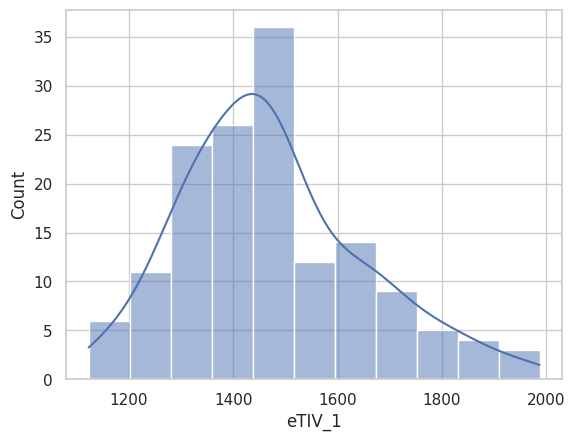

In [32]:
sns.histplot(data=df_pivot, x='eTIV_1', kde=True)
plt.show()

In [33]:
# Divide into groups
group1 = df_pivot[df_pivot['Group'] == 'Demented']['eTIV_1']
group2 = df_pivot[df_pivot['Group'] == 'Nondemented']['eTIV_1']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(group1, group2)

print(f'Mann-Whitney U Test Statistic: {stat}')
print(f'p-value: {p_value}')


Mann-Whitney U Test Statistic: 2297.5
p-value: 0.9791299171783464


'MMSE' feature

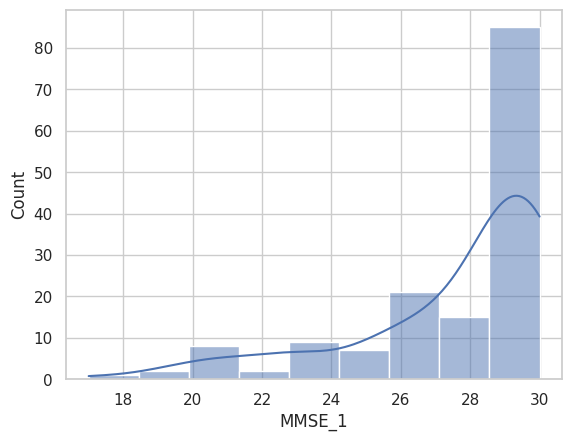

In [34]:
sns.histplot(data=df_pivot, x='MMSE_1', kde=True)
plt.show()

In [35]:
# Divide into groups
group1 = df_pivot[df_pivot['Group'] == 'Demented']['MMSE_1']
group2 = df_pivot[df_pivot['Group'] == 'Nondemented']['MMSE_1']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(group1, group2)

print(f'Mann-Whitney U Test Statistic: {stat}')
print(f'p-value: {p_value}')


Mann-Whitney U Test Statistic: 632.0
p-value: 9.962665804321837e-14


####'SES' feature

In [36]:
df1 = df_pivot.dropna(subset=['SES'])
print(df1.shape)

# Divide into groups
group1 = df1[df1['Group'] == 'Demented']['SES']
group2 = df1[df1['Group'] == 'Nondemented']['SES']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(group1, group2)

print(f'Mann-Whitney U Test Statistic: {stat}')
print(f'p-value: {p_value}')


(142, 40)
Mann-Whitney U Test Statistic: 2349.5
p-value: 0.0985546219166553


####Independent Samples T-Test

Make sure the distributions of both groups is normal

In [37]:
for f in ['Age_1', 'nWBV_1', 'ASF_1']:
  group1 = df_pivot[df_pivot['Group'] == 'Demented'][f]
  group2 = df_pivot[df_pivot['Group'] == 'Nondemented'][f]

  ks_stat_1, ks_p_1 = ks_stat, ks_p = kstest(group1, 'norm', args=(np.mean(group1), np.std(group1)))
  ks_stat_2, ks_p_2 = ks_stat, ks_p = kstest(group2, 'norm', args=(np.mean(group2), np.std(group2)))
  print(f"{f}")
  print(f'Demented KS Test Statistic: {ks_stat_1}')
  print(f'p-value: {ks_p_1}')
  print(f'Nondemented KS Test Statistic: {ks_stat_2}')
  print(f'p-value: {ks_p_2}')
  print()

Age_1
Demented KS Test Statistic: 0.07698789356342273
p-value: 0.8144701381508704
Nondemented KS Test Statistic: 0.06864710372750049
p-value: 0.8633547993349677

nWBV_1
Demented KS Test Statistic: 0.057195612052826084
p-value: 0.9771232129438837
Nondemented KS Test Statistic: 0.06403296494480179
p-value: 0.9108898009516051

ASF_1
Demented KS Test Statistic: 0.07600119381452891
p-value: 0.82616991585032
Nondemented KS Test Statistic: 0.062312311901844
p-value: 0.9260225762600576



Indeed normal

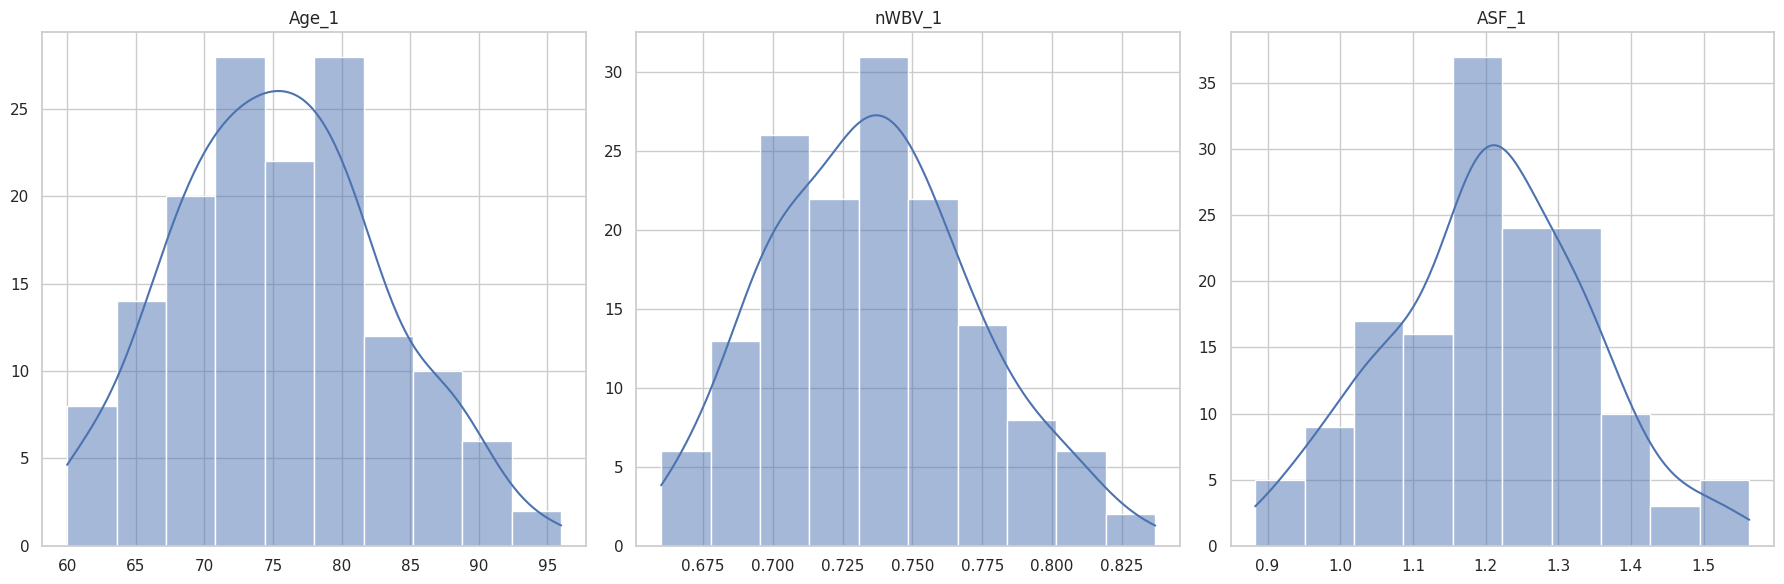

In [38]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Create a subplot for each feature
for i, feature in enumerate(['Age_1', 'nWBV_1', 'ASF_1'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_pivot, x=feature, kde=True)
    plt.title(f'{feature}')
    plt.xlabel('')
    plt.ylabel('')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

Make sure the variances of the two groups are roughly equal using Levene's test

In [39]:
from scipy.stats import levene

for f in ['Age_1', 'nWBV_1', 'ASF_1']:
  group1 = df_pivot[df_pivot['Group'] == 'Demented'][f]
  group2 = df_pivot[df_pivot['Group'] == 'Nondemented'][f]

  # Perform Levene's test
  stat, p_value = levene(group1, group2)

  # Output the result
  print(f"{f}")
  print(f'Levene\'s Test Statistic: {stat}')
  print(f'p-value: {p_value}')
  print()


Age_1
Levene's Test Statistic: 3.0515845435918725
p-value: 0.08294961892559187

nWBV_1
Levene's Test Statistic: 1.9755768274976722
p-value: 0.16217148292558323

ASF_1
Levene's Test Statistic: 0.5022747361008671
p-value: 0.47973345747025864



Indeed the variances between the Demented and Nondemented groups are not significantly different for these features.

In [40]:
from scipy.stats import ttest_ind

# List of features to test
features = ['Age_1', 'nWBV_1', 'ASF_1']

# Perform t-tests for each feature
for feature in features:
    # Extract data for each group
    group1 = df_pivot[df_pivot['Group'] == 'Demented'][feature]
    group2 = df_pivot[df_pivot['Group'] == 'Nondemented'][feature]

    # Perform the independent samples t-test
    t_stat, p_value = ttest_ind(group1, group2, equal_var=True)  # equal_var=True assumes equal variances

    # Output the result
    print(f"{feature}:")
    print(f'T-statistic: {t_stat}')
    print(f'p-value: {p_value}')
    print()


Age_1:
T-statistic: -0.24711205826562171
p-value: 0.8051997034539908

nWBV_1:
T-statistic: -3.5747438547688373
p-value: 0.0004881163113704605

ASF_1:
T-statistic: 0.05942517114300736
p-value: 0.9527019967112682



In [41]:
df_pivot.columns

Index(['Subject ID', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'MR Delay_1',
       'MR Delay_2', 'MR Delay_3', 'MR Delay_4', 'MR Delay_5', 'MMSE_1',
       'MMSE_2', 'MMSE_3', 'MMSE_4', 'MMSE_5', 'CDR_1', 'CDR_2', 'CDR_3',
       'CDR_4', 'CDR_5', 'eTIV_1', 'eTIV_2', 'eTIV_3', 'eTIV_4', 'eTIV_5',
       'nWBV_1', 'nWBV_2', 'nWBV_3', 'nWBV_4', 'nWBV_5', 'ASF_1', 'ASF_2',
       'ASF_3', 'ASF_4', 'ASF_5', 'EDUC', 'SES', 'M/F', 'Group'],
      dtype='object')

In [42]:
df_pivot['M/F'].value_counts()

,count
M/F,
F,88
M,62


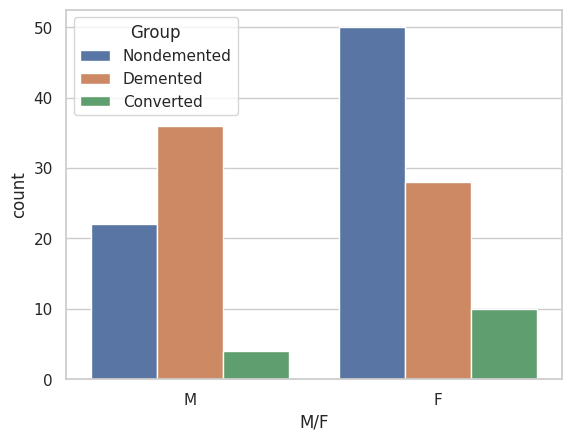

In [43]:
sns.countplot(data=df_pivot, x='M/F', hue='Group')
plt.show()

In [44]:
df_pivot['Group'].value_counts()

,count
Group,
Nondemented,72
Demented,64
Converted,14


In [45]:
df_pivot[df_pivot['Group'] == 'Converted']

,Subject ID,Age_1,Age_2,Age_3,Age_4,Age_5,MR Delay_1,MR Delay_2,MR Delay_3,MR Delay_4,...,nWBV_5,ASF_1,ASF_2,ASF_3,ASF_4,ASF_5,EDUC,SES,M/F,Group
13,OAS2_0018,87.0,NaN,88.0,92.0,NaN,0.0,NaN,489.0,1933.0,...,NaN,1.248,NaN,1.255,1.234,NaN,14,1.0,F,Converted
14,OAS2_0020,80.0,82.0,84.0,NaN,NaN,0.0,756.0,1563.0,NaN,...,NaN,1.106,1.093,1.099,NaN,NaN,20,1.0,M,Converted
23,OAS2_0031,86.0,88.0,91.0,NaN,NaN,0.0,446.0,1588.0,NaN,...,NaN,1.227,1.215,1.199,NaN,NaN,12,3.0,F,Converted
31,OAS2_0041,71.0,73.0,75.0,NaN,NaN,0.0,756.0,1331.0,NaN,...,NaN,1.362,1.356,1.335,NaN,NaN,16,1.0,F,Converted
44,OAS2_0054,85.0,87.0,NaN,NaN,NaN,0.0,846.0,NaN,NaN,...,NaN,1.388,1.376,NaN,NaN,NaN,18,1.0,F,Converted
75,OAS2_0092,83.0,84.0,NaN,NaN,NaN,0.0,706.0,NaN,NaN,...,NaN,1.269,1.263,NaN,NaN,NaN,12,2.0,F,Converted
85,OAS2_0103,69.0,74.0,75.0,NaN,NaN,0.0,1554.0,2002.0,NaN,...,NaN,1.250,1.233,1.236,NaN,NaN,16,1.0,F,Converted
97,OAS2_0118,67.0,71.0,NaN,NaN,NaN,0.0,1422.0,NaN,NaN,...,NaN,1.164,1.147,NaN,NaN,NaN,14,4.0,F,Converted
104,OAS2_0127,79.0,81.0,81.0,84.0,86.0,0.0,851.0,1042.0,2153.0,...,0.669,1.067,1.061,1.066,1.052,1.051,18,1.0,M,Converted
107,OAS2_0131,65.0,67.0,NaN,NaN,NaN,0.0,679.0,NaN,NaN,...,NaN,1.309,1.318,NaN,NaN,NaN,12,2.0,F,Converted


#### Chi-Square test

In [46]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_pivot['M/F'], df_pivot['Group'])

# Perform Chi-Square test
stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {stat}')
print(f'p-value: {p_value}')


Chi-Square Statistic: 10.261965856723922
p-value: 0.005910747775787819


In [47]:
# Check balance of diagnosis by gender
print(df_pivot['M/F'].value_counts())
print(df_pivot['Group'].value_counts())


M/F
F    88
M    62
Name: count, dtype: int64
Group
Nondemented    72
Demented       64
Converted      14
Name: count, dtype: int64


In [48]:
# Create contingency table
contingency_table = pd.crosstab(df_pivot['M/F'], df_pivot['Group'])
print(contingency_table)

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Expected Frequencies:\n{expected}')

Group  Converted  Demented  Nondemented
M/F                                    
F             10        28           50
M              4        36           22
Expected Frequencies:
[[ 8.21333333 37.54666667 42.24      ]
 [ 5.78666667 26.45333333 29.76      ]]


Explain why the results are valid (expected > 5 etc.)

### Paired comparisons

In [49]:
print(df_pivot.isnull().sum())

Subject ID      0
Age_1           0
Age_2           6
Age_3          92
Age_4         135
Age_5         144
MR Delay_1      0
MR Delay_2      6
MR Delay_3     92
MR Delay_4    135
MR Delay_5    144
MMSE_1          0
MMSE_2          7
MMSE_3         93
MMSE_4        135
MMSE_5        144
CDR_1           0
CDR_2           6
CDR_3          92
CDR_4         135
CDR_5         144
eTIV_1          0
eTIV_2          6
eTIV_3         92
eTIV_4        135
eTIV_5        144
nWBV_1          0
nWBV_2          6
nWBV_3         92
nWBV_4        135
nWBV_5        144
ASF_1           0
ASF_2           6
ASF_3          92
ASF_4         135
ASF_5         144
EDUC            0
SES             8
M/F             0
Group           0
dtype: int64


In [50]:
# Filter out patients who didn't come to the second visit
df_pivot_filtered = df_pivot.dropna(subset=['MMSE_1', 'MMSE_2'])

# Checking how many patients are left
print(f"Number of patients with data for both first and second visits: {df_pivot_filtered.shape[0]}")


Number of patients with data for both first and second visits: 143


In [51]:
# Filter patients who missed the second visit
missed_second_visit = df_pivot[df_pivot['MMSE_2'].isna() & df_pivot['MMSE_3'].notna()]

# Check MR Delay for the third visit
print(missed_second_visit[['Subject ID', 'MR Delay_3']])


    Subject ID  MR Delay_3
4    OAS2_0007       518.0
12   OAS2_0017       617.0
13   OAS2_0018       489.0
27   OAS2_0036       713.0
72   OAS2_0089       563.0
108  OAS2_0133      1006.0


In [52]:
print(df_pivot[['MR Delay_1', 'MR Delay_2', 'MR Delay_3', 'MR Delay_4', 'MR Delay_5']].describe().T)

            count         mean         std     min      25%     50%      75%  \
MR Delay_1  150.0     0.000000    0.000000     0.0     0.00     0.0     0.00   
MR Delay_2  144.0   714.145833  258.887776   182.0   556.75   673.0   795.25   
MR Delay_3   58.0  1332.637931  398.110039   489.0  1128.25  1369.0  1601.75   
MR Delay_4   15.0  1886.666667  376.686809   970.0  1792.50  1884.0  2130.00   
MR Delay_5    6.0  2257.333333  512.197878  1233.0  2373.25  2393.0  2487.75   

               max  
MR Delay_1     0.0  
MR Delay_2  1707.0  
MR Delay_3  2297.0  
MR Delay_4  2508.0  
MR Delay_5  2639.0  


In [53]:
# Create a combined dataset including those with data for the third visit
combined_data = pd.concat([df_pivot_filtered, missed_second_visit], ignore_index=True)

# Use MMSE_3 and MR Delay_3 for those who missed MMSE_2
combined_data.loc[combined_data['MMSE_2'].isna(), 'MMSE_2'] = combined_data['MMSE_3']
combined_data.loc[combined_data['MR Delay_2'].isna(), 'MR Delay_2'] = combined_data['MR Delay_3']

# Now drop MMSE_3 and MR Delay_3 as they are no longer needed
combined_data = combined_data.drop(columns=['MMSE_3', 'MR Delay_3'])

# Checking how many patients are left after this adjustment
print(f"Number of patients after including third visit data: {combined_data.shape[0]}")


Number of patients after including third visit data: 149


In [54]:
combined_data.isnull().sum()

,0
Subject ID,0
Age_1,0
Age_2,6
Age_3,92
Age_4,134
Age_5,143
MR Delay_1,0
MR Delay_2,0
MR Delay_4,134
MR Delay_5,143


In [55]:
import pandas as pd

# Assuming df_pivot is your original dataframe

# Filter out patients without a second visit and those who didn't come to the second visit
df_pivot_filtered = df_pivot.dropna(subset=['MMSE_1', 'MMSE_2'])
missed_second_visit = df_pivot[(df_pivot['MMSE_2'].isna()) & (df_pivot['MMSE_3'].notna())]

# Create a combined dataset including those with data for the third visit
combined_data = pd.concat([df_pivot_filtered, missed_second_visit], ignore_index=True)

# Use values from the third visit for those who missed the second visit
features = ['Age', 'CDR', 'eTIV', 'nWBV', 'ASF']  # Add other features as needed

for feature in features:
    combined_data.loc[combined_data[f'{feature}_2'].isna(), f'{feature}_2'] = combined_data[f'{feature}_3']

# Also do this for MMSE and MR Delay as previously
combined_data.loc[combined_data['MMSE_2'].isna(), 'MMSE_2'] = combined_data['MMSE_3']
combined_data.loc[combined_data['MR Delay_2'].isna(), 'MR Delay_2'] = combined_data['MR Delay_3']

# Now drop third visit data as they are no longer needed
columns_to_drop = [f'{feature}_3' for feature in features] + ['MMSE_3', 'MR Delay_3']
combined_data = combined_data.drop(columns=columns_to_drop)

# Checking how many patients are left after this adjustment
print(f"Number of patients after including third visit data: {combined_data.shape[0]}")

# You can now proceed with your analysis using combined_data


Number of patients after including third visit data: 149


In [56]:
combined_data.isnull().sum()

,0
Subject ID,0
Age_1,0
Age_2,0
Age_4,134
Age_5,143
MR Delay_1,0
MR Delay_2,0
MR Delay_4,134
MR Delay_5,143
MMSE_1,0


In [57]:
combined_data.drop(columns=['Age_4', 'Age_5', 'MR Delay_4', 'MR Delay_5', 'MMSE_4',
       'MMSE_5', 'CDR_4', 'CDR_5','eTIV_4', 'eTIV_5', 'nWBV_4', 'nWBV_5', 'ASF_4',
                            'ASF_5'], inplace=True)

In [58]:
combined_data.columns

Index(['Subject ID', 'Age_1', 'Age_2', 'MR Delay_1', 'MR Delay_2', 'MMSE_1',
       'MMSE_2', 'CDR_1', 'CDR_2', 'eTIV_1', 'eTIV_2', 'nWBV_1', 'nWBV_2',
       'ASF_1', 'ASF_2', 'EDUC', 'SES', 'M/F', 'Group'],
      dtype='object')

In [59]:
combined_data.shape

(149, 19)

In [60]:
combined_data.head()

,Subject ID,Age_1,Age_2,MR Delay_1,MR Delay_2,MMSE_1,MMSE_2,CDR_1,CDR_2,eTIV_1,eTIV_2,nWBV_1,nWBV_2,ASF_1,ASF_2,EDUC,SES,M/F,Group
0,OAS2_0001,87.0,88.0,0.0,457.0,27.0,30.0,0.0,0.0,1987.0,2004.0,0.696,0.681,0.883,0.876,14,2.0,M,Nondemented
1,OAS2_0002,75.0,76.0,0.0,560.0,23.0,28.0,0.5,0.5,1678.0,1738.0,0.736,0.713,1.046,1.010,12,NaN,M,Demented
2,OAS2_0004,88.0,90.0,0.0,538.0,28.0,27.0,0.0,0.0,1215.0,1200.0,0.710,0.718,1.444,1.462,18,3.0,F,Nondemented
3,OAS2_0005,80.0,83.0,0.0,1010.0,28.0,29.0,0.0,0.5,1689.0,1701.0,0.712,0.711,1.039,1.032,12,4.0,M,Nondemented
4,OAS2_0008,93.0,95.0,0.0,742.0,30.0,29.0,0.0,0.0,1272.0,1257.0,0.698,0.703,1.380,1.396,14,2.0,F,Nondemented


In [61]:
combined_data['MMSE_change'] = combined_data['MMSE_2'] - combined_data['MMSE_1']

diagnosed_change = combined_data[combined_data['Group'] == 'Demented']['MMSE_change']
undiagnosed_change = combined_data[combined_data['Group'] == 'Nondemented']['MMSE_change']

ks_stat_diagnosed, p_value_diagnosed = kstest(diagnosed_change, 'norm')
ks_stat_undiagnosed, p_value_undiagnosed = kstest(undiagnosed_change, 'norm')

print(f"Diagnosed Group - KS Statistic: {ks_stat_diagnosed}, p-value: {p_value_diagnosed}")
print(f"Undiagnosed Group - KS Statistic: {ks_stat_undiagnosed}, p-value: {p_value_undiagnosed}")



Diagnosed Group - KS Statistic: 0.3810272857510826, p-value: 9.85047369367759e-09
Undiagnosed Group - KS Statistic: 0.2222222222222222, p-value: 0.0013257618800724957


In [62]:
u_stat, p_value_mannwhitney = mannwhitneyu(diagnosed_change, undiagnosed_change)
print(f'Mann-Whitney U test: U-statistic = {u_stat}, p-value = {p_value_mannwhitney}')

Mann-Whitney U test: U-statistic = 1832.0, p-value = 0.04956375042026786


<Axes: xlabel='MMSE_change', ylabel='Count'>

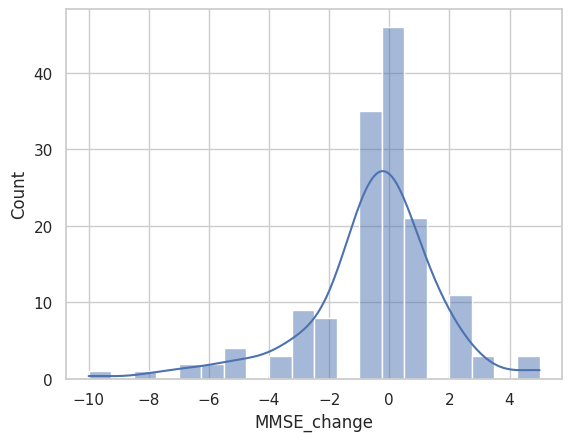

In [63]:
sns.histplot(data=combined_data, x='MMSE_change', kde=True)

Different approach to select '2nd' visit:

In [64]:
min_delay = 500
max_delay = 800

In [65]:
def select_closest_visit(row, min_delay, max_delay):
    delay_columns = [col for col in row.index if 'MR Delay' in col]
    closest_delay = None
    closest_diff = float('inf')
    for col in delay_columns:
        delay_value = row[col]
        if pd.notna(delay_value):
            if min_delay <= delay_value <= max_delay:
                return col
            else:
                diff = min(abs(delay_value - min_delay), abs(delay_value - max_delay))
                if diff < closest_diff:
                    closest_diff = diff
                    closest_delay = col
    return closest_delay

In [66]:
df_pivot['Selected Visit'] = df_pivot.apply(select_closest_visit, axis=1, args=(min_delay, max_delay))

In [67]:
df_pivot['Selected Visit'].value_counts()

,count
Selected Visit,
MR Delay_2,133
MR Delay_3,11
MR Delay_1,6


In [68]:
# Example with MMSE and Age as features (extend this with all features you want to include)

# Initialize an empty dataframe to store the selected data
selected_data = pd.DataFrame(index=df_pivot.index)

# Loop through each feature and select the corresponding data from the chosen visit
for feature in ['MMSE', 'Age', 'CDR', 'MR Delay']:  # Add all the features you are interested in
    # Create the column name for the selected feature based on the selected visit
    selected_data[feature] = df_pivot.apply(lambda row: row[f"{feature}_{int(row['Selected Visit'].split('_')[-1])}"], axis=1)

# You can add the 'Group' column or any other necessary columns
selected_data['Group'] = df_pivot['Group']
selected_data['M/F'] = df_pivot['M/F']

# Now selected_data contains the MMSE, Age, CDR, etc., from the selected visit for each patient


In [69]:
selected_data

,MMSE,Age,CDR,MR Delay,Group,M/F
0,30.0,88.0,0.0,457.0,Nondemented,M
1,28.0,76.0,0.5,560.0,Demented,M
2,27.0,90.0,0.0,538.0,Nondemented,F
3,29.0,83.0,0.5,1010.0,Nondemented,M
4,27.0,73.0,1.0,518.0,Demented,M
...,...,...,...,...,...,...
145,20.0,75.0,0.5,776.0,Demented,M
146,30.0,68.0,0.0,732.0,Nondemented,F
147,21.0,73.0,1.0,553.0,Demented,F
148,28.0,82.0,0.5,842.0,Demented,M
